In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

In [2]:
# Ler o arquivo
df_train = pd.read_csv('/kaggle/input/aprendizado-de-mquina-20241-predio-de-churn/train_churn_.csv', sep = ';')
df_test = pd.read_csv('/kaggle/input/aprendizado-de-mquina-20241-predio-de-churn/test_churn_.csv')
sample_submission = pd.read_csv('/kaggle/input/aprendizado-de-mquina-20241-predio-de-churn/sample_submission_.csv')

In [3]:
df_train.head()

,Unnamed: 0,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,Masculino,0.0,Sim,Sim,35.0,Sim,Sim,Não,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,Não,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
1,1961,Feminino,0.0,Não,Não,42.0,Sim,Sim,DSL,NaN,...,Não,Não,1 Ano,Sim,Transferência Bancária (Automática),60.15,2421.6,0.0,0.0,0.0
2,5308,Feminino,0.0,Não,Não,69.0,Sim,Não,DSL,Sim,...,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),82.45,5555.3,0.0,0.0,0.0
3,3587,Masculino,1.0,Não,Não,9.0,Sim,NaN,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cartão de Crédito (Automático),99.45,919.4,0.0,0.0,1.0
4,576,Masculino,0.0,Sim,Sim,31.0,Sim,Sim,Fibra óptica,Sim,...,Sim,Não,1 Ano,Não,Transferência Bancária (Automática),98.05,3082.1,NaN,0.0,0.0


In [4]:
df_test.head()

,index,Unnamed: 0,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,...,ServicoSuporteTecnico,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico
0,0,2450,Feminino,0.0,Sim,Sim,72.0,Sim,Sim,Fibra óptica,...,Sim,Sim,Sim,2 Anos,Sim,Transferência Bancária (Automática),110.45,8058.85,0.0,0.0
1,1,4649,Masculino,0.0,Sim,Não,72.0,Sim,Sim,Fibra óptica,...,Sim,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),108.95,NaN,5.0,5.0
2,2,1237,Masculino,0.0,Não,NaN,13.0,Sim,Não,Não,...,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,1 Ano,Não,Cheque por Carta,19.45,NaN,0.0,0.0
3,3,4415,Masculino,0.0,Sim,NaN,22.0,Sim,NaN,DSL,...,Não,Não,Não,2 Anos,Sim,Cartão de Crédito (Automático),66.10,4428.45,NaN,0.0
4,4,6697,Feminino,0.0,Não,Não,NaN,Sim,Sim,DSL,...,Não,NaN,NaN,1 Ano,Sim,Cartão de Crédito (Automático),79.30,2427.10,0.0,1.0


In [5]:
# Apagar a primeira coluna
df_train = df_train.drop('Unnamed: 0', axis = 1)
df_test = df_test.drop(['index','Unnamed: 0'], axis = 1)

In [6]:
# Tamanho da base
df_train.shape , df_test.shape

((5000, 22), (1942, 21))

In [7]:
# Tipos das colunas
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genero                 4759 non-null   object 
 1   idoso                  4735 non-null   float64
 2   parceiro               4762 non-null   object 
 3   dependentes            4766 non-null   object 
 4   tempoDeServico         4747 non-null   float64
 5   ServicoTelefone        4789 non-null   object 
 6   MultiLinhas            4745 non-null   object 
 7   ServicoInternet        4771 non-null   object 
 8   ServicoSegurancaCyber  4778 non-null   object 
 9   ServicoBackup          4737 non-null   object 
 10  SeguroDispositivos     4750 non-null   object 
 11  ServicoSuporteTecnico  4767 non-null   object 
 12  StreamingTV            4751 non-null   object 
 13  StreamingFilmes        4775 non-null   object 
 14  Contrato               4738 non-null   object 
 15  Bill

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genero                 1863 non-null   object 
 1   idoso                  1852 non-null   float64
 2   parceiro               1842 non-null   object 
 3   dependentes            1841 non-null   object 
 4   tempoDeServico         1848 non-null   float64
 5   ServicoTelefone        1839 non-null   object 
 6   MultiLinhas            1829 non-null   object 
 7   ServicoInternet        1844 non-null   object 
 8   ServicoSegurancaCyber  1842 non-null   object 
 9   ServicoBackup          1842 non-null   object 
 10  SeguroDispositivos     1833 non-null   object 
 11  ServicoSuporteTecnico  1839 non-null   object 
 12  StreamingTV            1844 non-null   object 
 13  StreamingFilmes        1842 non-null   object 
 14  Contrato               1832 non-null   object 
 15  Bill

In [9]:
# Converter a coluna para float
df_train['FaturaTotal'] = pd.to_numeric(df_train['FaturaTotal'], errors='coerce')

In [10]:
# Verificando valores nulos
df_train.isna().sum()

genero                   241
idoso                    265
parceiro                 238
dependentes              234
tempoDeServico           253
ServicoTelefone          211
MultiLinhas              255
ServicoInternet          229
ServicoSegurancaCyber    222
ServicoBackup            263
SeguroDispositivos       250
ServicoSuporteTecnico    233
StreamingTV              249
StreamingFilmes          225
Contrato                 262
BillingDigital           238
MetodoPagamento          244
FaturaMensal             274
FaturaTotal              247
NumTickets               269
NumTicketsTecnico        255
Churn                    264
dtype: int64

In [11]:
df_test.isna().sum()

genero                    79
idoso                     90
parceiro                 100
dependentes              101
tempoDeServico            94
ServicoTelefone          103
MultiLinhas              113
ServicoInternet           98
ServicoSegurancaCyber    100
ServicoBackup            100
SeguroDispositivos       109
ServicoSuporteTecnico    103
StreamingTV               98
StreamingFilmes          100
Contrato                 110
BillingDigital            92
MetodoPagamento           86
FaturaMensal             100
FaturaTotal              101
NumTickets                86
NumTicketsTecnico         97
dtype: int64

In [12]:
# Valores únicos de cada coluna categórica
for i in df_train:
  if df_train[i].dtypes == 'object':
    print(f'{i} :  {df_train[i].unique()}')

genero :  ['Masculino' 'Feminino' nan]
parceiro :  ['Sim' 'Não' nan]
dependentes :  ['Sim' 'Não' nan]
ServicoTelefone :  ['Sim' nan 'Não']
MultiLinhas :  ['Sim' 'Não' nan 'Sem serviço de telefone']
ServicoInternet :  ['Não' 'DSL' 'Fibra óptica' nan]
ServicoSegurancaCyber :  ['Sem serviço de internet' nan 'Sim' 'Não']
ServicoBackup :  ['Sem serviço de internet' 'Sim' 'Não' nan]
SeguroDispositivos :  ['Sem serviço de internet' 'Não' 'Sim' nan]
ServicoSuporteTecnico :  ['Sem serviço de internet' 'Não' 'Sim' nan]
StreamingTV :  ['Sem serviço de internet' 'Não' 'Sim' nan]
StreamingFilmes :  ['Sem serviço de internet' 'Não' 'Sim' nan]
Contrato :  ['2 Anos' '1 Ano' 'Mensal' nan]
BillingDigital :  ['Não' 'Sim' nan]
MetodoPagamento :  ['Transferência Bancária (Automática)' 'Cartão de Crédito (Automático)'
 'Cheque Eletrônico' 'Cheque por Carta' nan]


In [13]:
# Substituir valores
df_train.replace('Sem serviço de internet', 'Não', inplace = True)
df_train.replace('Sem serviço de telefone', 'Não', inplace = True)

df_test.replace('Sem serviço de internet', 'Não', inplace = True)
df_test.replace('Sem serviço de telefone', 'Não', inplace = True)

In [14]:
# Preencher valores nulos na coluna genero
df_train['genero'].fillna('Masculino', inplace = True)
df_test['genero'].fillna('Masculino', inplace = True)

/tmp/ipykernel_18/1128687940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['genero'].fillna('Masculino', inplace = True)
/tmp/ipykernel_18/1128687940.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [15]:
# Preencher valores nulos na coluna idoso
df_train['idoso'].fillna(0, inplace = True)
df_test['idoso'].fillna(0, inplace = True)

/tmp/ipykernel_18/196557934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['idoso'].fillna(0, inplace = True)
/tmp/ipykernel_18/196557934.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [16]:
# Preencher valores nulos na coluna parceiro
df_train['parceiro'].fillna('Não', inplace = True)
df_test['parceiro'].fillna('Não', inplace = True)

/tmp/ipykernel_18/3649459296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['parceiro'].fillna('Não', inplace = True)
/tmp/ipykernel_18/3649459296.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [17]:
# Preencher valores nulos na coluna dependentes
df_train['dependentes'].fillna('Não', inplace = True)
df_test['dependentes'].fillna('Não', inplace = True)

/tmp/ipykernel_18/3259269219.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['dependentes'].fillna('Não', inplace = True)
/tmp/ipykernel_18/3259269219.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [18]:
df_train['ServicoTelefone'].fillna('Sim', inplace = True)
df_test['ServicoTelefone'].fillna('Sim', inplace = True)

/tmp/ipykernel_18/237041725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['ServicoTelefone'].fillna('Sim', inplace = True)
/tmp/ipykernel_18/237041725.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [19]:
df_train['MultiLinhas'].fillna('Não', inplace = True)
df_test['MultiLinhas'].fillna('Não', inplace = True)

/tmp/ipykernel_18/1301138879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MultiLinhas'].fillna('Não', inplace = True)
/tmp/ipykernel_18/1301138879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [20]:
# Função para preencher os valores nulos da multilinha com base em outra coluna
def preencher_servico_internet(row):
  if pd.isnull(row['ServicoInternet']):
    if (row['ServicoSegurancaCyber'] == 'Não') & (row['ServicoBackup'] == 'Não') & (row['SeguroDispositivos'] == 'Não') & (row['ServicoSuporteTecnico'] == 'Não') &(row['StreamingTV'] == 'Não') & (row['StreamingFilmes'] == 'Não'):
      return 'Não'
    else:
      return 'Fibra óptica'
  else:
    return row['ServicoInternet']

df_train['ServicoInternet'] = df_train.apply(preencher_servico_internet, axis=1)
df_test['ServicoInternet'] = df_test.apply(preencher_servico_internet, axis=1)

In [21]:
# Preencher os valores vazios nas colunas
colunas_para_preencher = ['ServicoSegurancaCyber', 'ServicoBackup', 'SeguroDispositivos', 'ServicoSuporteTecnico', 'StreamingTV', 'StreamingFilmes']

for coluna in colunas_para_preencher:
    df_train[coluna].fillna('Não', inplace=True)
    df_test[coluna].fillna('Não', inplace=True)

/tmp/ipykernel_18/4098380928.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[coluna].fillna('Não', inplace=True)
/tmp/ipykernel_18/4098380928.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [22]:
# Preencher valores nulos na coluna Contrato
df_train['Contrato'].fillna('Mensal', inplace = True)
df_test['Contrato'].fillna('Mensal', inplace = True)

/tmp/ipykernel_18/3710679931.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Contrato'].fillna('Mensal', inplace = True)
/tmp/ipykernel_18/3710679931.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [23]:
# Preencher valores nulos na coluna BillingDigital
df_train['BillingDigital'].fillna('Sim', inplace = True)
df_test['BillingDigital'].fillna('Sim', inplace = True)

/tmp/ipykernel_18/1417859580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['BillingDigital'].fillna('Sim', inplace = True)
/tmp/ipykernel_18/1417859580.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [24]:
# Preencher valores nulos na coluna BillingDigital
df_train['MetodoPagamento'].fillna('Cheque Eletrônico', inplace = True)
df_test['MetodoPagamento'].fillna('Cheque Eletrônico', inplace = True)

/tmp/ipykernel_18/1660932648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MetodoPagamento'].fillna('Cheque Eletrônico', inplace = True)
/tmp/ipykernel_18/1660932648.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

## Tratamento das colunas numéricas

In [25]:
df_train.columns

Index(['genero', 'idoso', 'parceiro', 'dependentes', 'tempoDeServico',
       'ServicoTelefone', 'MultiLinhas', 'ServicoInternet',
       'ServicoSegurancaCyber', 'ServicoBackup', 'SeguroDispositivos',
       'ServicoSuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'Contrato',
       'BillingDigital', 'MetodoPagamento', 'FaturaMensal', 'FaturaTotal',
       'NumTickets', 'NumTicketsTecnico', 'Churn'],
      dtype='object')

<Axes: >

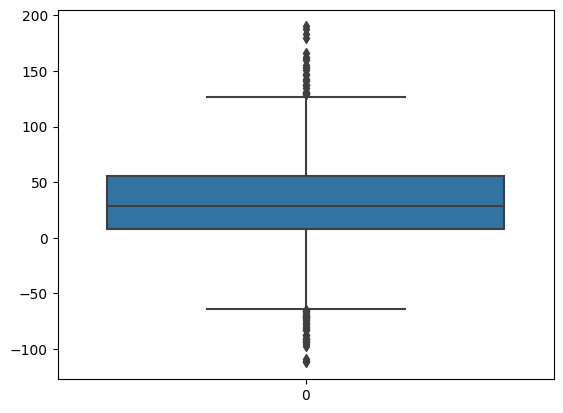

In [26]:
# Analisar a distribuição dos dados
sns.boxplot(df_train['tempoDeServico'])

In [27]:
# Transformar os valores negativos em positivos
df_train['tempoDeServico'] = df_train['tempoDeServico'].apply(lambda x: abs(x))
df_test['tempoDeServico'] = df_test['tempoDeServico'].apply(lambda x: abs(x))

In [28]:
df_train['tempoDeServico'].describe()

count    4747.000000
mean       34.329261
std        27.043340
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       190.000000
Name: tempoDeServico, dtype: float64

In [29]:
# Preencher valores nulos pela média
df_train['tempoDeServico'].fillna(35, inplace = True)
df_test['tempoDeServico'].fillna(35, inplace = True)

/tmp/ipykernel_18/522733946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['tempoDeServico'].fillna(35, inplace = True)
/tmp/ipykernel_18/522733946.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

<Axes: >

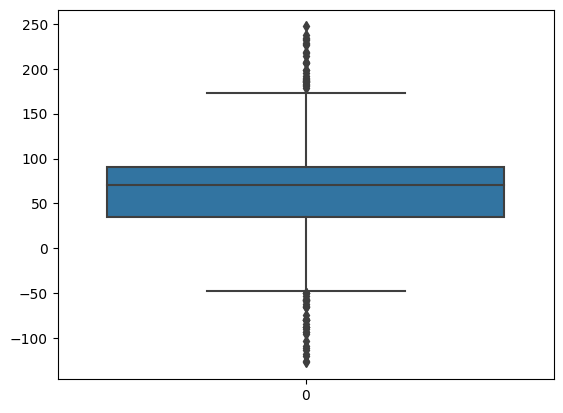

In [30]:
# Analisar a distribuição dos dados
sns.boxplot(df_train['FaturaMensal'])

In [31]:
# Transformar os valores negativos em positivos
df_train['FaturaMensal'] = df_train['FaturaMensal'].apply(lambda x: abs(x))
df_test['FaturaMensal'] = df_test['FaturaMensal'].apply(lambda x: abs(x))

In [32]:
df_train['FaturaMensal'].describe()

count    4726.000000
mean       66.366483
std        32.950073
min         2.000000
25%        36.300000
50%        70.650000
75%        90.500000
max       247.000000
Name: FaturaMensal, dtype: float64

In [33]:
# Preencher valores nulos pela média
df_train['FaturaMensal'].fillna(66, inplace = True)
df_test['FaturaMensal'].fillna(66, inplace = True)

/tmp/ipykernel_18/39909715.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['FaturaMensal'].fillna(66, inplace = True)
/tmp/ipykernel_18/39909715.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

<Axes: >

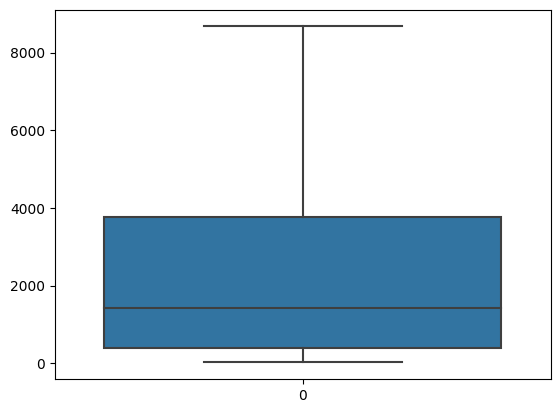

In [34]:
# Analisar a distribuição dos dados
sns.boxplot(df_train['FaturaTotal'])

In [35]:
df_train['FaturaTotal'].describe()

count    4753.000000
mean     2275.284252
std      2248.815792
min        18.850000
25%       385.550000
50%      1410.250000
75%      3778.200000
max      8672.450000
Name: FaturaTotal, dtype: float64

In [36]:
# Preencher valores nulos
df_train['FaturaTotal'].fillna(2275, inplace = True)
df_test['FaturaTotal'].fillna(2275, inplace = True)

/tmp/ipykernel_18/345448389.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['FaturaTotal'].fillna(2275, inplace = True)
/tmp/ipykernel_18/345448389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [37]:
df_train['NumTickets'].value_counts()

NumTickets
0.0    3937
3.0     175
5.0     160
2.0     157
1.0     155
4.0     147
Name: count, dtype: int64

In [38]:
# Preencher valores nulos
df_train['NumTickets'].fillna(0, inplace = True)
df_test['NumTickets'].fillna(0, inplace = True)

/tmp/ipykernel_18/3986409997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['NumTickets'].fillna(0, inplace = True)
/tmp/ipykernel_18/3986409997.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [39]:
df_train['NumTicketsTecnico'].value_counts()

NumTicketsTecnico
0.0    4105
1.0     163
2.0     135
3.0      99
4.0      95
5.0      74
6.0      53
7.0      15
8.0       6
Name: count, dtype: int64

In [40]:
# Preencher valores nulos pela média
df_train['NumTicketsTecnico'].fillna(0, inplace = True)
df_test['NumTicketsTecnico'].fillna(0, inplace = True)

/tmp/ipykernel_18/2918576383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['NumTicketsTecnico'].fillna(0, inplace = True)
/tmp/ipykernel_18/2918576383.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

<Axes: title={'center': 'Churn'}, xlabel='Churn'>

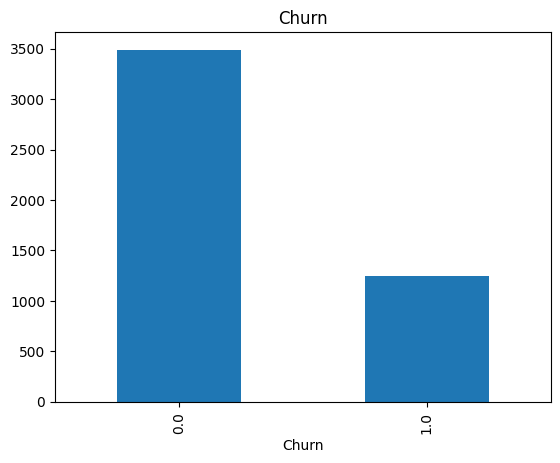

In [41]:
df_train.Churn.value_counts().plot(kind =  'bar', title = 'Churn')

In [42]:
df_train.dropna(subset = ['Churn'], inplace = True)

In [43]:
df_train.columns

Index(['genero', 'idoso', 'parceiro', 'dependentes', 'tempoDeServico',
       'ServicoTelefone', 'MultiLinhas', 'ServicoInternet',
       'ServicoSegurancaCyber', 'ServicoBackup', 'SeguroDispositivos',
       'ServicoSuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'Contrato',
       'BillingDigital', 'MetodoPagamento', 'FaturaMensal', 'FaturaTotal',
       'NumTickets', 'NumTicketsTecnico', 'Churn'],
      dtype='object')

In [44]:
# One Hot Encoded nas colunas categóricas, excluindo aquela com a menor frequência
colunas_categoricas = ['genero',
                       'parceiro',
                       'dependentes',
                       'ServicoTelefone',
                       'MultiLinhas',
                       'ServicoInternet',
                       'ServicoSegurancaCyber',
                       'ServicoBackup',
                       'SeguroDispositivos',
                       'ServicoSuporteTecnico',
                       'StreamingTV',
                       'StreamingFilmes',
                       'Contrato',
                       'BillingDigital',
                       'MetodoPagamento']

one_hot_encoded = pd.get_dummies(df_train[colunas_categoricas])
one_hot_encoded.columns

Index(['genero_Feminino', 'genero_Masculino', 'parceiro_Não', 'parceiro_Sim',
       'dependentes_Não', 'dependentes_Sim', 'ServicoTelefone_Não',
       'ServicoTelefone_Sim', 'MultiLinhas_Não', 'MultiLinhas_Sim',
       'ServicoInternet_DSL', 'ServicoInternet_Fibra óptica',
       'ServicoInternet_Não', 'ServicoSegurancaCyber_Não',
       'ServicoSegurancaCyber_Sim', 'ServicoBackup_Não', 'ServicoBackup_Sim',
       'SeguroDispositivos_Não', 'SeguroDispositivos_Sim',
       'ServicoSuporteTecnico_Não', 'ServicoSuporteTecnico_Sim',
       'StreamingTV_Não', 'StreamingTV_Sim', 'StreamingFilmes_Não',
       'StreamingFilmes_Sim', 'Contrato_1 Ano', 'Contrato_2 Anos',
       'Contrato_Mensal', 'BillingDigital_Não', 'BillingDigital_Sim',
       'MetodoPagamento_Cartão de Crédito (Automático)',
       'MetodoPagamento_Cheque Eletrônico', 'MetodoPagamento_Cheque por Carta',
       'MetodoPagamento_Transferência Bancária (Automática)'],
      dtype='object')

In [45]:
# Concatenando o dataframe e apagando as colunas dummies
df_train = pd.concat([df_train, one_hot_encoded], axis=1)
df_train.drop(columns = colunas_categoricas, inplace = True)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_train[['tempoDeServico',	'FaturaMensal',	'FaturaTotal']] = scaler.fit_transform(df_train[['tempoDeServico',	'FaturaMensal',	'FaturaTotal']])
df_train.head()

,idoso,tempoDeServico,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn,genero_Feminino,genero_Masculino,parceiro_Não,...,StreamingFilmes_Sim,Contrato_1 Ano,Contrato_2 Anos,Contrato_Mensal,BillingDigital_Não,BillingDigital_Sim,MetodoPagamento_Cartão de Crédito (Automático),MetodoPagamento_Cheque Eletrônico,MetodoPagamento_Cheque por Carta,MetodoPagamento_Transferência Bancária (Automática)
0,0.0,0.184211,0.095714,0.091338,0.0,0.0,0.0,False,True,False,...,False,False,True,False,True,False,False,False,False,True
1,0.0,0.221053,0.237347,0.277659,0.0,0.0,0.0,True,False,True,...,False,True,False,False,False,True,False,False,False,True
2,0.0,0.363158,0.328367,0.639786,0.0,0.0,0.0,True,False,True,...,True,False,True,False,False,True,True,False,False,False
3,1.0,0.047368,0.397755,0.104067,0.0,0.0,1.0,False,True,True,...,True,False,False,True,False,True,True,False,False,False
4,0.0,0.163158,0.392041,0.353986,0.0,0.0,0.0,False,True,False,...,False,True,False,False,True,False,False,False,False,True


In [47]:
# Separar as bases
X = df_train.drop(['Churn'], axis = 1)
y = df_train[['Churn']]
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [48]:
# Bibliotecas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separa X e y de treinamento (70%) validação (10%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

2024-06-17 11:55:47.931438: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 11:55:47.931588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 11:55:48.102113: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [1]:

# Separa X e y de treinamento (70%) validação (10%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Rede Neural para Classificação Binária
def create_base_model(input_shape):
    model = Sequential([
       #Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Função para criar o modelo com L1 e L2 (Elastic Net)
def create_l1_l2_model(input_shape):
    model = Sequential([
        #Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(1, activation='sigmoid')
    ])
    return model

# Função para criar o modelo com Dropout
def create_dropout_model(input_shape):
    model = Sequential([
       #Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Função para criar o modelo com L1, L2 e Dropout
def create_l1_l2_dropout_model(input_shape):
    model = Sequential([
       #Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(1, activation='sigmoid')
    ])
    return model

# Inicia com uma forma de entrada específica
input_shape = X_train.shape[1]

# Criar, compilar e treinar os modelos
model_base = create_base_model(input_shape)
model_l1_l2 = create_l1_l2_model(input_shape)
model_dropout = create_dropout_model(input_shape)
model_l1_l2_dropout = create_l1_l2_dropout_model(input_shape)

# Compilando e treinando os modelos
optimizer1 = Adam(learning_rate=0.001)
optimizer2 = Adam(learning_rate=0.001)
optimizer3 = Adam(learning_rate=0.001)
optimizer4 = Adam(learning_rate=0.001)

model_base.compile(optimizer=optimizer1, loss='binary_crossentropy', metrics=['accuracy'] )
history_base = model_base.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_l1_l2.compile(optimizer=optimizer2, loss='binary_crossentropy', metrics=['accuracy'])
history_l1_l2 = model_l1_l2.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_dropout.compile(optimizer=optimizer3, loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_l1_l2_dropout.compile(optimizer=optimizer4, loss='binary_crossentropy', metrics=['accuracy'])
history_l1_l2_dropout = model_l1_l2_dropout.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)



# Fazendo as previsões
y_pred_base = model_base.predict(X_test).flatten()
y_pred_l1_l2 = model_l1_l2.predict(X_test).flatten()
y_pred_dropout = model_dropout.predict(X_test).flatten()
y_pred_l1_l2_dropout = model_l1_l2_dropout.predict(X_test).flatten()




# Função para converter os resultados da variável y_pred_base para 0 e 1
def converter_pred(y_pred):
    converter_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
    return converter_pred

# Previsões dos modelos
y_pred_base = converter_pred(y_pred_base)
y_pred_l1_l2 = converter_pred(y_pred_l1_l2)
y_pred_dropout = converter_pred(y_pred_dropout)
y_pred_l1_l2_dropout = converter_pred(y_pred_l1_l2_dropout)


from sklearn.svm import SVC
modelo_svm = SVC()

# Treinar o modelo SVM
modelo_svm.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_svm = modelo_svm.predict(X_test)

# Avaliar o desempenho do modelo
acuracia_svm = accuracy_score(y_test, y_pred_svm)


acuracia_base = accuracy_score(y_test, y_pred_base)
acuracia_l1_l2 = accuracy_score(y_test, y_pred_l1_l2)
acuracia_dropout = accuracy_score(y_test, y_pred_dropout)
acuracia_l1_l2_dropout = accuracy_score(y_test, y_pred_l1_l2_dropout)


# Plotando os resultados
labels = ['Base', 'L1_L2', 'Dropout', 'L1_L2_Dropout', 'SVM' ]
values = [acuracia_base, acuracia_l1_l2, acuracia_dropout, acuracia_l1_l2_dropout, acuracia_svm]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação da Acurácia entre Modelos')
plt.show()

NameError: name 'train_test_split' is not defined

In [ ]:
# Rede Neural para Classificação Binária
def create_base_model(input_shape):
    model = Sequential([
       #Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Função para criar o modelo com L1 e L2 (Elastic Net)
def create_l1_l2_model(input_shape):
    model = Sequential([
        #Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(1, activation='sigmoid')
    ])
    return model

# Função para criar o modelo com Dropout
def create_dropout_model(input_shape):
    model = Sequential([
       #Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Função para criar o modelo com L1, L2 e Dropout
def create_l1_l2_dropout_model(input_shape):
    model = Sequential([
       #Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(1, activation='sigmoid')
    ])
    return model

In [50]:
# Inicia com uma forma de entrada específica
input_shape = X_train.shape[1]

# Criar, compilar e treinar os modelos
model_base = create_base_model(input_shape)
model_l1_l2 = create_l1_l2_model(input_shape)
model_dropout = create_dropout_model(input_shape)
model_l1_l2_dropout = create_l1_l2_dropout_model(input_shape)

# Compilando e treinando os modelos
optimizer1 = Adam(learning_rate=0.001)
optimizer2 = Adam(learning_rate=0.001)
optimizer3 = Adam(learning_rate=0.001)
optimizer4 = Adam(learning_rate=0.001)

model_base.compile(optimizer=optimizer1, loss='binary_crossentropy', metrics=['accuracy'] )
history_base = model_base.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_l1_l2.compile(optimizer=optimizer2, loss='binary_crossentropy', metrics=['accuracy'])
history_l1_l2 = model_l1_l2.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_dropout.compile(optimizer=optimizer3, loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_l1_l2_dropout.compile(optimizer=optimizer4, loss='binary_crossentropy', metrics=['accuracy'])
history_l1_l2_dropout = model_l1_l2_dropout.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Fazendo as previsões
y_pred_base = model_base.predict(X_test).flatten()
y_pred_l1_l2 = model_l1_l2.predict(X_test).flatten()
y_pred_dropout = model_dropout.predict(X_test).flatten()
y_pred_l1_l2_dropout = model_l1_l2_dropout.predict(X_test).flatten()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [52]:
# Função para converter os resultados da variável y_pred_base para 0 e 1
def converter_pred(y_pred):
    converter_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
    return converter_pred

In [53]:
# Previsões dos modelos
y_pred_base = converter_pred(y_pred_base)
y_pred_l1_l2 = converter_pred(y_pred_l1_l2)
y_pred_dropout = converter_pred(y_pred_dropout)
y_pred_l1_l2_dropout = converter_pred(y_pred_l1_l2_dropout)

In [54]:
from sklearn.svm import SVC
modelo_svm = SVC()

# Treinar o modelo SVM
modelo_svm.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_svm = modelo_svm.predict(X_test)

# Avaliar o desempenho do modelo
acuracia_svm = accuracy_score(y_test, y_pred_svm)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
acuracia_base = accuracy_score(y_test, y_pred_base)
acuracia_l1_l2 = accuracy_score(y_test, y_pred_l1_l2)
acuracia_dropout = accuracy_score(y_test, y_pred_dropout)
acuracia_l1_l2_dropout = accuracy_score(y_test, y_pred_l1_l2_dropout)

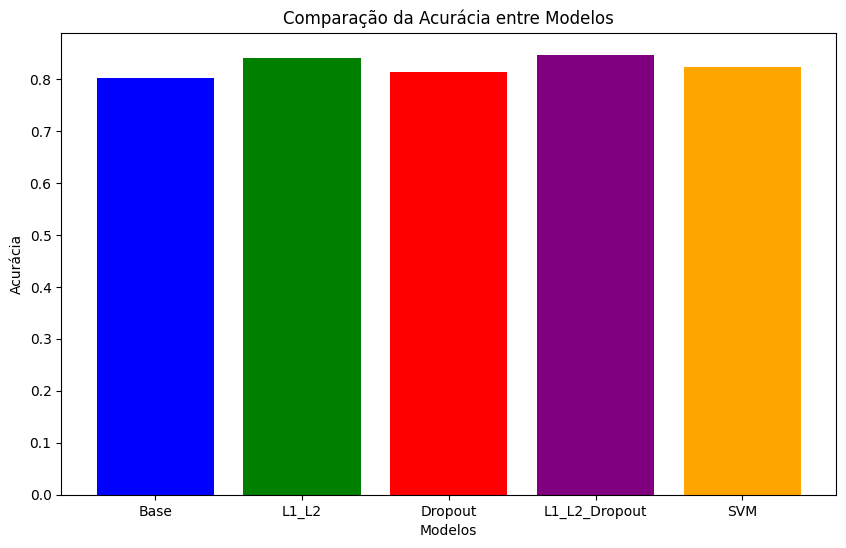

In [56]:
# Plotando os resultados
labels = ['Base', 'L1_L2', 'Dropout', 'L1_L2_Dropout', 'SVM' ]
values = [acuracia_base, acuracia_l1_l2, acuracia_dropout, acuracia_l1_l2_dropout, acuracia_svm]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação da Acurácia entre Modelos')
plt.show()

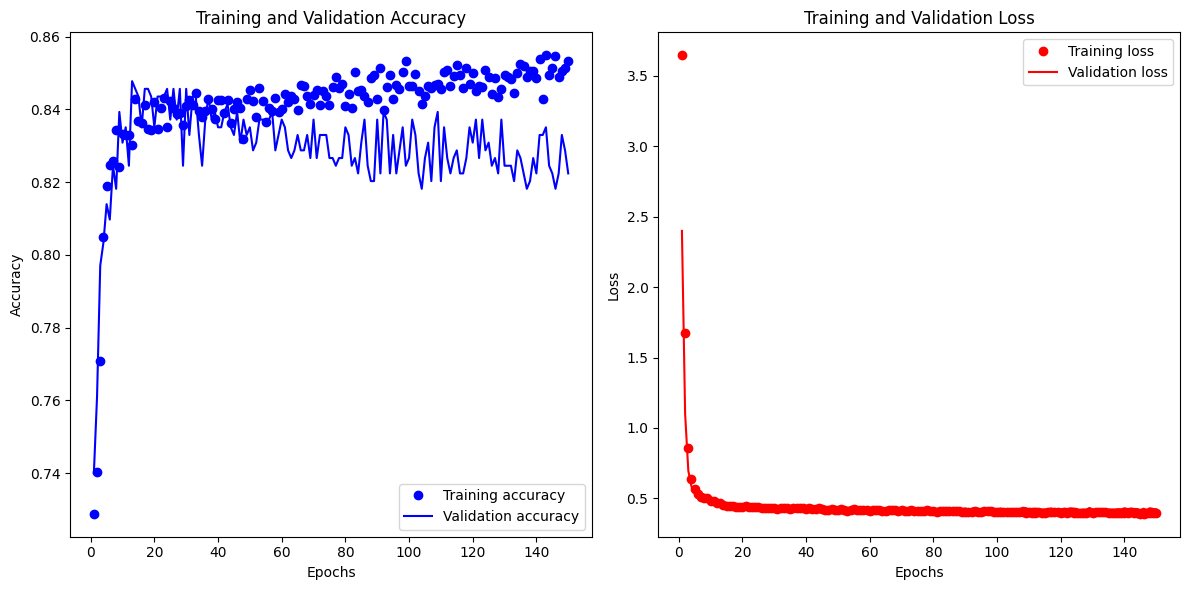

In [57]:
# Acessando os dados de histórico
acc = history_l1_l2_dropout.history['accuracy']
val_acc = history_l1_l2_dropout.history['val_accuracy']
loss = history_l1_l2_dropout.history['loss']
val_loss = history_l1_l2_dropout.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

# Plotando a acurácia de treinamento e validação
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotando o loss de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import roc_curve, auc
# Prever probabilidades para o conjunto de validação
y_val_prob = model_l1_l2_dropout.predict(X_val).ravel()

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


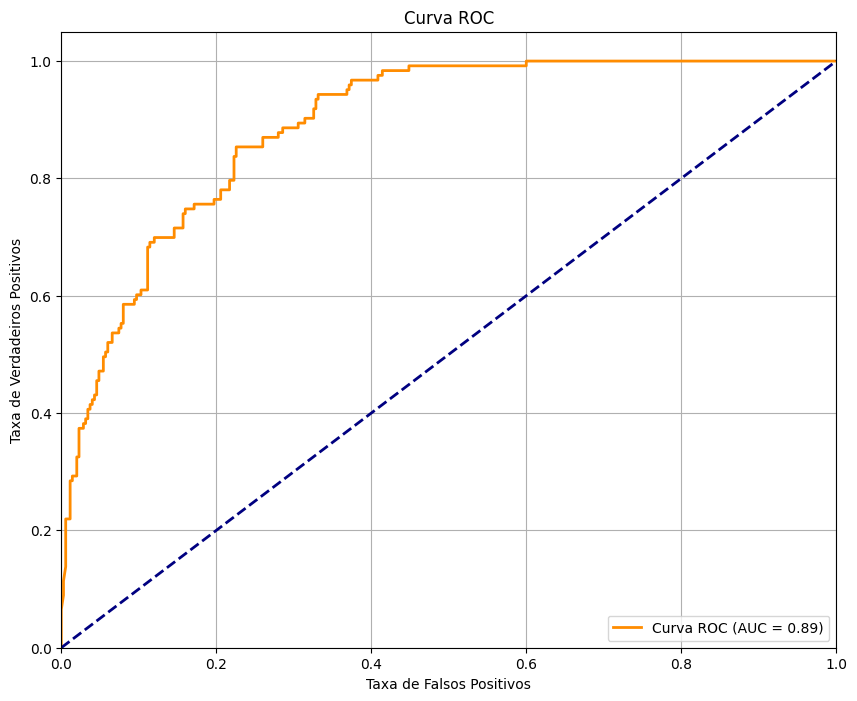

In [59]:
plt.figure(figsize=(10, 8))

# Plotar a curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()

plt.show()

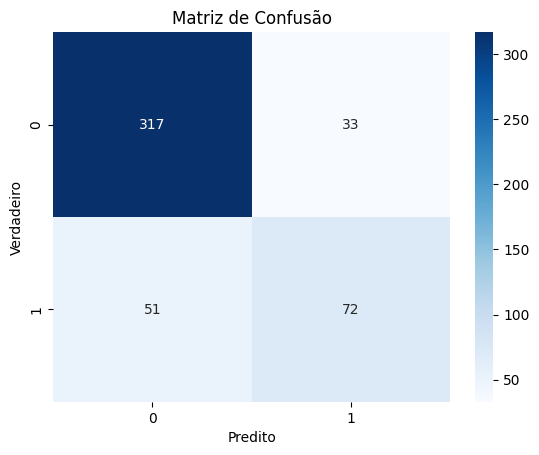

In [60]:
from sklearn.metrics import confusion_matrix
# Prever classes para o conjunto de validação
y_val_pred = (y_val_prob > 0.5).astype(int)

# Calcular a matriz de confusão
cm = confusion_matrix(y_val, y_val_pred)

# Plotar a matriz de confusão usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [61]:
# Definir rótulos das classes
class_names = ['Classe Negativa', 'Classe Positiva']
# Imprimir o classification report
print("Relatório de Classificação:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

Relatório de Classificação:
                 precision    recall  f1-score   support

Classe Negativa       0.86      0.91      0.88       350
Classe Positiva       0.69      0.59      0.63       123

       accuracy                           0.82       473
      macro avg       0.77      0.75      0.76       473
   weighted avg       0.82      0.82      0.82       473



# Classe Negativa:

## **Precision (Precisão): 0.87**

## **Recall (Revocação): 0.89**

## **F1-score: 0.88**

Para a classe negativa, o modelo apresenta uma precisão de 0.87, o que significa que, quando ele prediz que uma instância é da classe negativa, ele está correto em 87% das vezes. O recall de 0.89 indica que o modelo consegue identificar corretamente 89% das instâncias que realmente são da classe negativa. O F1-score de 0.88 é uma média harmônica entre precisão e recall, refletindo um bom equilíbrio entre essas métricas para a classe negativa.


# Classe Positiva:

## **Precision (Precisão): 0.65**

## **Recall (Revocação): 0.61**

## **F1-score: 0.63**

Para a classe positiva, o modelo apresenta uma precisão de 0.65, indicando que, quando prediz que uma instância é da classe positiva, ele está correto em 65% das vezes. O recall de 0.61 mostra que o modelo identifica corretamente 61% das instâncias que são realmente da classe positiva. O F1-score de 0.63, embora menor que o da classe negativa, ainda indica um equilíbrio razoável entre precisão e recall para a classe positiva

# Conclusão
O modelo que obteve o melhor desempenho foi a rede neural com a regularização L1 e L2 com o dropout. A partir dos gráficos e das métricas obtidas pelo modelo, ele demonstra um desempenho robusto para a classe negativa, com altas métricas de precisão e recall, indicando uma capacidade confiável de identificar instâncias que não pertencem à classe positiva. Entretanto, para a classe positiva, embora a precisão seja razoável, o recall é um pouco mais baixo, sugerindo que o modelo pode estar perdendo algumas instâncias que são realmente da classe positiva. Em resumo, enquanto o modelo é eficaz na identificação da classe negativa, há oportunidades para refinamento na detecção da classe positiva, especialmente em melhorar o recall para capturar mais instâncias positivas verdadeiras.

In [62]:
df_test.columns

Index(['genero', 'idoso', 'parceiro', 'dependentes', 'tempoDeServico',
       'ServicoTelefone', 'MultiLinhas', 'ServicoInternet',
       'ServicoSegurancaCyber', 'ServicoBackup', 'SeguroDispositivos',
       'ServicoSuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'Contrato',
       'BillingDigital', 'MetodoPagamento', 'FaturaMensal', 'FaturaTotal',
       'NumTickets', 'NumTicketsTecnico'],
      dtype='object')

In [63]:
one_hot_encoded = pd.get_dummies(df_test[colunas_categoricas])
one_hot_encoded.columns

Index(['genero_Feminino', 'genero_Masculino', 'parceiro_Não', 'parceiro_Sim',
       'dependentes_Não', 'dependentes_Sim', 'ServicoTelefone_Não',
       'ServicoTelefone_Sim', 'MultiLinhas_Não', 'MultiLinhas_Sim',
       'ServicoInternet_DSL', 'ServicoInternet_Fibra óptica',
       'ServicoInternet_Não', 'ServicoSegurancaCyber_Não',
       'ServicoSegurancaCyber_Sim', 'ServicoBackup_Não', 'ServicoBackup_Sim',
       'SeguroDispositivos_Não', 'SeguroDispositivos_Sim',
       'ServicoSuporteTecnico_Não', 'ServicoSuporteTecnico_Sim',
       'StreamingTV_Não', 'StreamingTV_Sim', 'StreamingFilmes_Não',
       'StreamingFilmes_Sim', 'Contrato_1 Ano', 'Contrato_2 Anos',
       'Contrato_Mensal', 'BillingDigital_Não', 'BillingDigital_Sim',
       'MetodoPagamento_Cartão de Crédito (Automático)',
       'MetodoPagamento_Cheque Eletrônico', 'MetodoPagamento_Cheque por Carta',
       'MetodoPagamento_Transferência Bancária (Automática)'],
      dtype='object')

In [64]:
# Concatenando o dataframe e apagando as colunas dummies
df_test = pd.concat([df_test, one_hot_encoded], axis=1)
df_test.drop(columns = colunas_categoricas, inplace = True)

In [65]:
df_test[['tempoDeServico',	'FaturaMensal',	'FaturaTotal']] = scaler.fit_transform(df_test[['tempoDeServico',	'FaturaMensal',	'FaturaTotal']])
df_test.head()

,idoso,tempoDeServico,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,genero_Feminino,genero_Masculino,parceiro_Não,parceiro_Sim,...,StreamingFilmes_Sim,Contrato_1 Ano,Contrato_2 Anos,Contrato_Mensal,BillingDigital_Não,BillingDigital_Sim,MetodoPagamento_Cartão de Crédito (Automático),MetodoPagamento_Cheque Eletrônico,MetodoPagamento_Cheque por Carta,MetodoPagamento_Transferência Bancária (Automática)
0,0.0,0.431138,0.478139,0.927769,0.0,0.0,True,False,False,True,...,True,False,True,False,False,True,False,False,False,True
1,0.0,0.431138,0.471645,0.260347,5.0,5.0,False,True,False,True,...,True,False,True,False,False,True,True,False,False,False
2,0.0,0.077844,0.084199,0.260347,0.0,0.0,False,True,True,False,...,False,True,False,False,True,False,False,False,True,False
3,0.0,0.131737,0.286147,0.508842,0.0,0.0,False,True,False,True,...,False,False,True,False,False,True,True,False,False,False
4,0.0,0.209581,0.343290,0.277898,0.0,1.0,True,False,True,False,...,False,True,False,False,False,True,True,False,False,False


In [66]:
y_test_pred = model_l1_l2_dropout.predict(df_test).flatten()
y_test_pred = converter_pred(y_test_pred)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [67]:
sample_submission['Churn'] = y_test_pred

In [68]:
sample_submission.to_csv('submission.csv', index = False)